First we need to import our data. The data is stored in idx3-ubyte files. Thank you [Siladittya Manna](https://medium.com/@mannasiladittya/converting-mnist-data-in-idx-format-to-python-numpy-array-5cb9126f99f1) for the information on wrangling this data. The format for the image files is shown below.

|[offset] | [type] | [value] | [description]|
|------|------|------|------|
| 0000 | 32 bit integer | 0x00000803(2051)| magic number|
| 0004 | 32 bit integer | 60000 | number of images |
| 0008 | 32 bit integer | 28 | number of rows|
| 0012 | 32 bit integer | 28 | number of columns| 
| 0016 | unsigned byte  | ?? | pixel |
| 0017 | unsigned byte  | ?? | pixel |

The format for the label files is shown below.

|[offset] | [type] | [value] | [description]|
|------|------|------|------|
| 0000 | 32 bit integer | 0x00000803(2051)| magic number|
| 0004 | 32 bit integer | 60000 | number of items |
| 0016 | unsigned byte  | ?? | pixel |
| 0017 | unsigned byte  | ?? | pixel |

In [32]:
import gzip
import numpy as np
import struct as st

filename = {'images' : 'data/train-images-idx3-ubyte' ,'labels' : 'data/train-labels-idx1-ubyte'}

#Open the images IDX file in readable binary mode.
with open(filename['images'],'rb') as train_imagesfile:
    train_imagesfile.seek(0)
    # Read the magic number and the dimensions of the image data-set
    magic = st.unpack('>4B',train_imagesfile.read(4))
    n_img = st.unpack('>I',train_imagesfile.read(4))[0] #num of images
    n_rows = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
    n_col = st.unpack('>I',train_imagesfile.read(4))[0] #num of column
    
    # read image data into images_array
    nBytesTotal = n_img*n_rows*n_col*1 #since each pixel data is 1 byte
    train_images_array = 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal,train_imagesfile.read(nBytesTotal))).reshape((n_img,n_rows,n_col))

In [33]:
with open(filename['labels'],'rb') as train_labels_file:
    train_labels_file.seek(0)
    # Read the magic number and the dimensions of the image data-set
    magic = st.unpack('>4B',train_labels_file.read(4))
    n_img = st.unpack('>I',train_labels_file.read(4))[0] #num of images

    # read label data into label array
    nBytesTotal = n_img*1 #since each label is 1 byte
    train_labels_array = np.asarray(st.unpack('>'+'B'*nBytesTotal,train_labels_file.read(nBytesTotal))).reshape((n_img,1))

Let us see how our numbers look

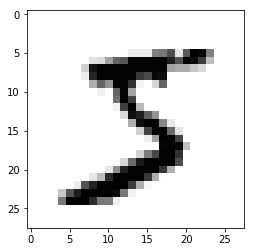

In [35]:
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

for image in train_images_array:
    # Plot
    plt.imshow(image, cmap='gray')
    plt.show()
    time.sleep(2)
    break # I only want to see one for now. comment to loop through entire training set 
    clear_output()